#### Are we **happpy** ? 
#### **Happiness** is the experience of joy, contentment, or positive well-being, combined with a sense that one's life is good, meaningful, and worthwhile.
#### Are we **happier** over the years? What does the Data Says? Lets find out !!!

## Importing the neccessay Libraries 

In [16]:
# Imports and preparing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

import warnings
warnings.filterwarnings("ignore")

import folium # for the map

# Setting the default style of the plots
sns.set_style('whitegrid')
sns.set_palette('Set2')


In [17]:
# My custom color palette
my_palette = ["#7A92FF", "#FF7AEF", "#B77AFF", "#A9FF7A", "#FFB27A", "#FF7A7A",
             "#7AFEFF", "#D57AFF", "#FFDF7A", "#D3FF7A"]

In [18]:
# List of years to loop through
years = list(range(2020, 2025))

# List to store the dataframes
data_frames = []

for year in years:
    file_name = f"{year}.csv"
    file_path = f"../input/world-happiness-report-2020-2024/{file_name}"
    
    df = pd.read_csv(file_path)
    df['Year'] = year
    data_frames.append(df)

    
data = pd.concat(data_frames, axis=0)
data.head(3)

,Country name,Happiness Rank,Happiness score,Upperwhisker,Lowerwhisker,Economy (GDP per Capita)\t,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Finland,1,7.81,7.87,7.75,1.29,1.50,0.96,0.66,0.16,0.48,2020
1,Denmark,2,7.65,7.71,7.58,1.33,1.50,0.98,0.67,0.24,0.50,2020
2,Switzerland,3,7.56,7.63,7.49,1.39,1.47,1.04,0.63,0.27,0.41,2020


In [19]:
data.columns

Index(['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker',
       'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

In [20]:
data = data [['Country name', 'Happiness Rank', 'Happiness score', 'Economy (GDP per Capita)\t', 'Social support',
                       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
                       'Year']]


In [26]:
new_names = ['Country or region', 'Rank', 'Score', 'GDP per capita', 'Social support',
                       'Health life expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption','Year']
data.columns = new_names


### Basic Analysis 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 142
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country or region          728 non-null    object 
 1   Rank                       728 non-null    int64  
 2   Score                      728 non-null    float64
 3   GDP per capita             728 non-null    float64
 4   Social support             728 non-null    float64
 5   Health life expectancy     728 non-null    float64
 6   Freedom                    728 non-null    float64
 7   Generosity                 728 non-null    float64
 8   Perceptions of corruption  728 non-null    float64
 9   Year                       728 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 62.6+ KB


In [28]:
data.isnull().sum()

Country or region            0
Rank                         0
Score                        0
GDP per capita               0
Social support               0
Health life expectancy       0
Freedom                      0
Generosity                   0
Perceptions of corruption    0
Year                         0
dtype: int64

### Handling the missing values

Since there are only few missing values in our dataset we just filled the NaN with 0

In [29]:
null_columns = data.columns[data.isnull().sum() > 0]
print(null_columns)

Index([], dtype='object')


In [30]:
data = data.fillna(0)

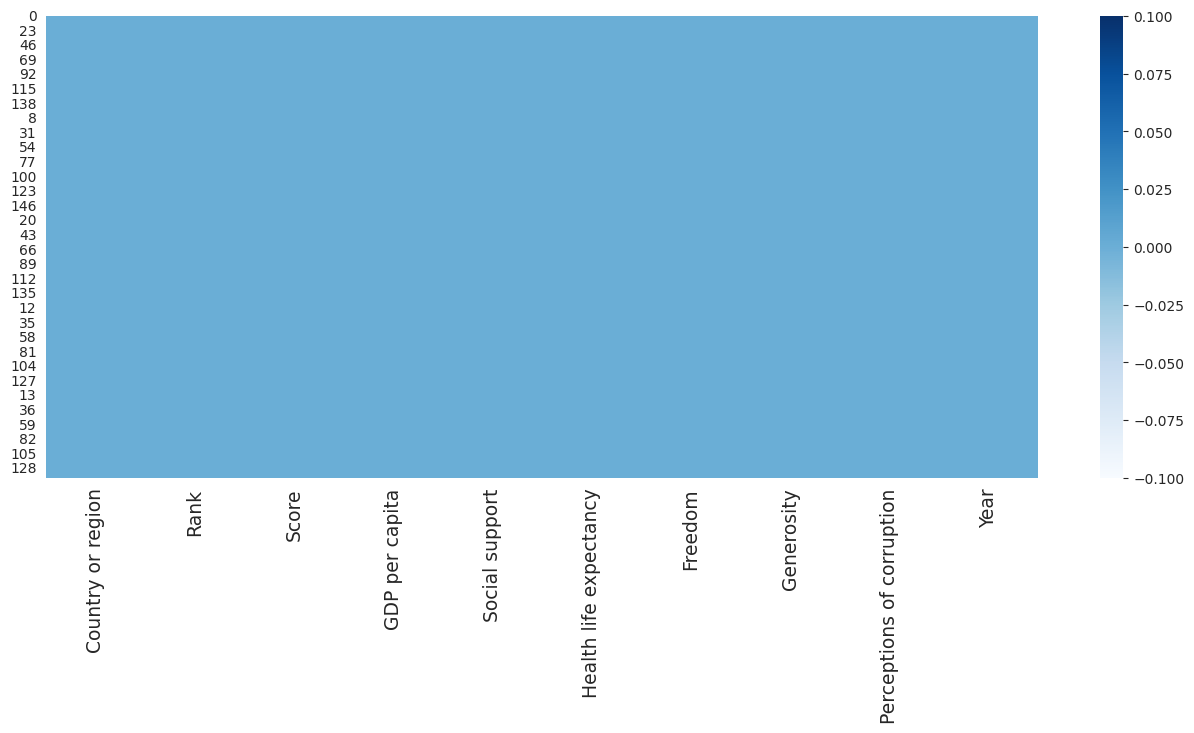

In [31]:
# Double check to see if there are any missing values left
plt.figure(figsize = (16,6))
sns.heatmap(data = data.isna(), cmap = 'Blues')

plt.xticks(fontsize = 13.5);

Done with Data Cleaning and Preprocessing

Let move on the other sections

### We shall go thru the Data

In [32]:
data.shape

(728, 10)

In [33]:
data.groupby(by='Year')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2020,153.0,5.473203,1.112110,2.570,4.72000,5.5100,6.230,7.810
2021,149.0,5.532839,1.073924,2.523,4.85200,5.5340,6.255,7.842
2022,146.0,5.553575,1.086843,2.404,4.88875,5.5685,6.305,7.821
2023,137.0,5.539796,1.139929,1.859,4.72400,5.6840,6.334,7.804
2024,143.0,5.527580,1.170717,1.721,4.72600,5.7850,6.416,7.741


Intrestingly the year after Covid 19 is having the Highest Rank in Happiness and then after that its getting reduced year by year

In [37]:
# First we group the data by year and average the factors
grouped = data.groupby(by = 'Year')[['Score', 'GDP per capita',
'Social support','Health life expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption']].mean().reset_index()


 


# Now we reconstruct the df by using melt() function

grouped = pd.melt(frame = grouped, id_vars='Year', value_vars=['Score', 'GDP per capita',
'Social support','Health life expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption'], var_name='Factor', value_name='Avg_value')

grouped.head()

,Year,Factor,Avg_value
0,2020,Score,5.473203
1,2021,Score,5.532839
2,2022,Score,5.553575
3,2023,Score,5.539796
4,2024,Score,5.527580


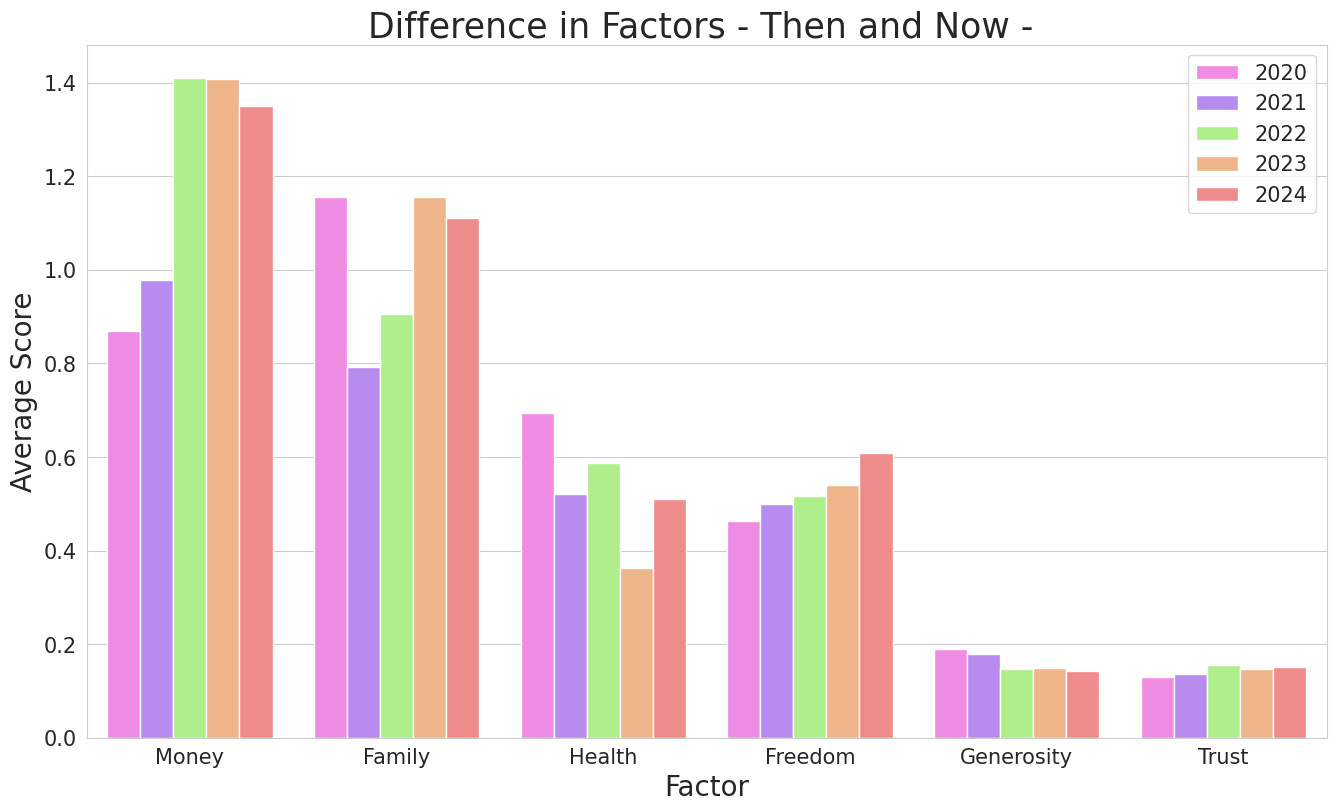

In [38]:
plt.figure(figsize = (16, 9))

ax = sns.barplot(x = grouped[grouped['Factor'] != 'Score']['Factor'], y = grouped['Avg_value'], 
            palette = my_palette[1:], hue = grouped['Year'])

plt.title("Difference in Factors - Then and Now - ", fontsize = 25)
plt.xlabel("Factor", fontsize = 20)
plt.ylabel("Average Score", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

ax.set_xticklabels(['Money','Family', 'Health', 'Freedom', 'Generosity', 'Trust']);

### Current Top and Bottom Countries 

In [40]:
# Average top 10 most happy countries
country_score_avg = data[data['Year']==2024].groupby(by = ['Country or region'])['Score'].mean().reset_index()
table = country_score_avg.sort_values(by = 'Score', ascending = False).head(10)

table

,Country or region,Score
40,Finland,7.741
32,Denmark,7.583
53,Iceland,7.525
122,Sweden,7.344
59,Israel,7.341
94,Netherlands,7.319
100,Norway,7.302
77,Luxembourg,7.122
123,Switzerland,7.060
5,Australia,7.057


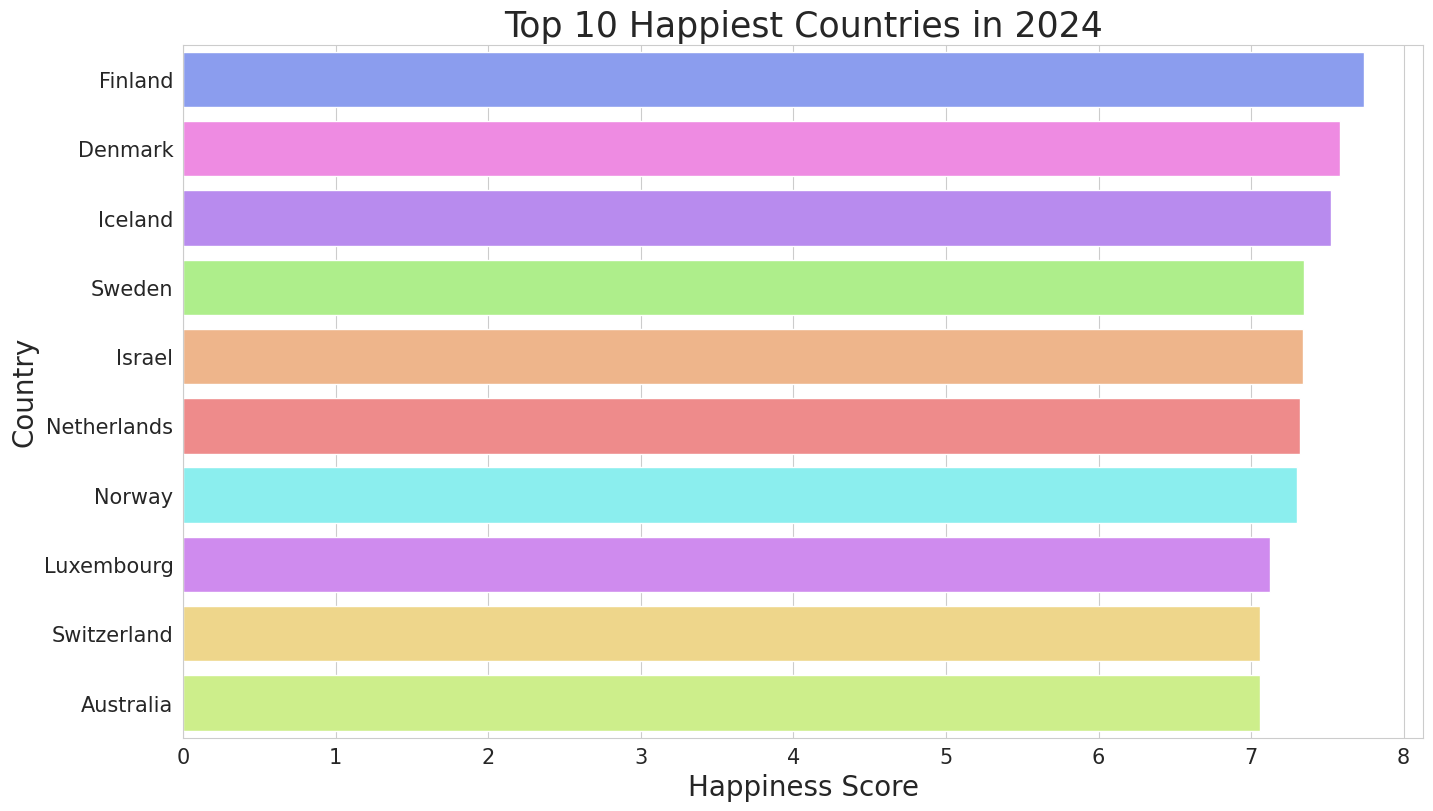

In [41]:
plt.figure(figsize = (16, 9))
sns.barplot(y = table['Country or region'], x = table['Score'], palette = my_palette)

plt.title("Top 10 Happiest Countries in 2024", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [42]:
# Average top 10 most "not that happy" countries
table2 = country_score_avg.sort_values(by = 'Score', ascending = True).head(10)

table2

,Country or region,Score
0,Afghanistan,1.721
72,Lebanon,2.707
73,Lesotho,3.186
113,Sierra Leone,3.245
27,Congo (Kinshasa),3.295
142,Zimbabwe,3.341
14,Botswana,3.383
79,Malawi,3.421
38,Eswatini,3.502
141,Zambia,3.502


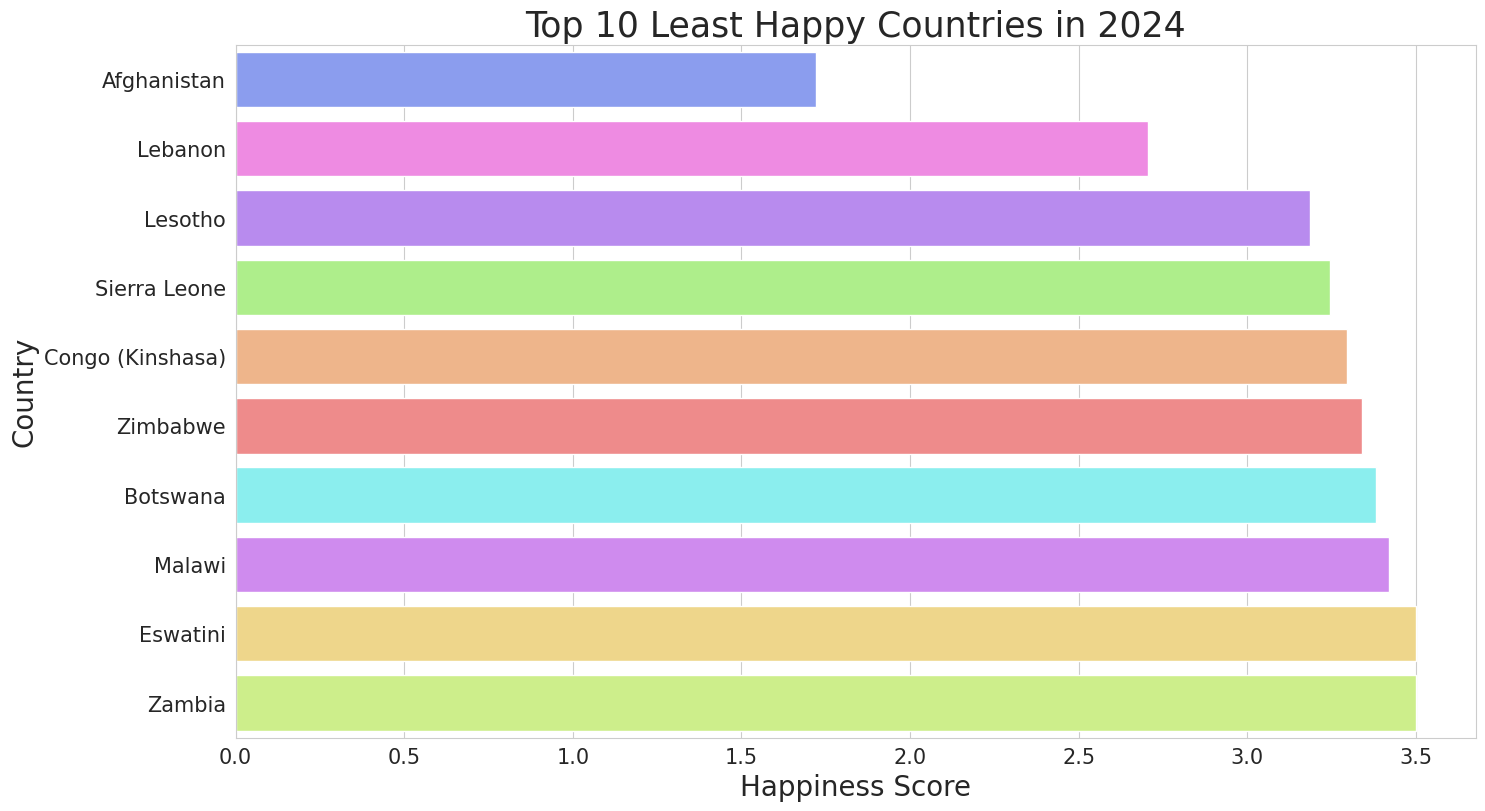

In [45]:
plt.figure(figsize = (16, 9))
sns.barplot(y = table2['Country or region'], x = table2['Score'], palette = my_palette)

plt.title("Top 10 Least Happy Countries in 2024", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);



Visualization clearly shows the top and bottom counties and as expected the countries which are having better governence and insfrastructure are on the top and countries which are having internal problems and wars are with poor governence and they are on the bottom. 

### Lets check what story does the Rank says in 2024

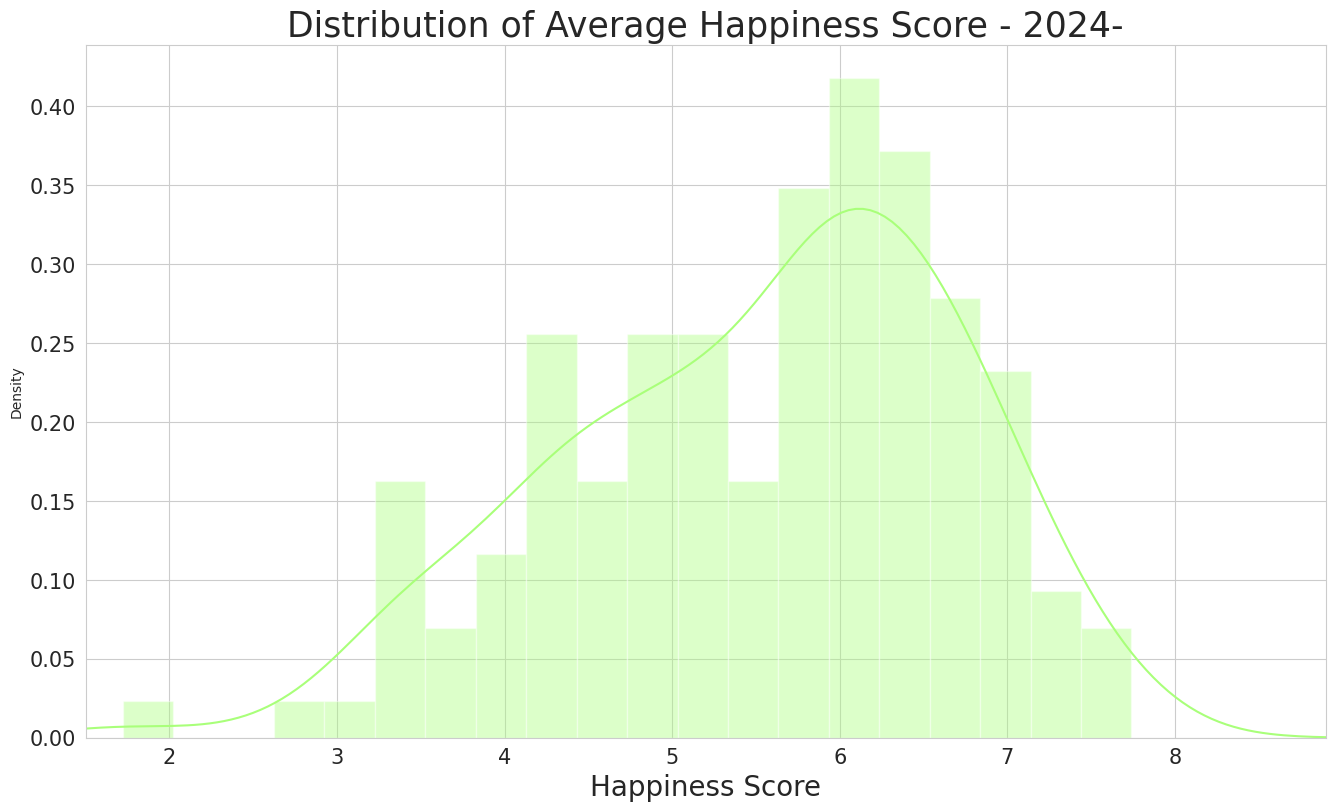

In [47]:
# Checking the distribution for Happiness Score
plt.figure(figsize = (16, 9))

sns.distplot(a = country_score_avg['Score'], bins = 20, kde = True, color = "#A9FF7A")
plt.xlabel('Happiness Score', fontsize = 20)
plt.title('Distribution of Average Happiness Score - 2024-', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((1.5, 8.9));

### What we can make out from other factores 

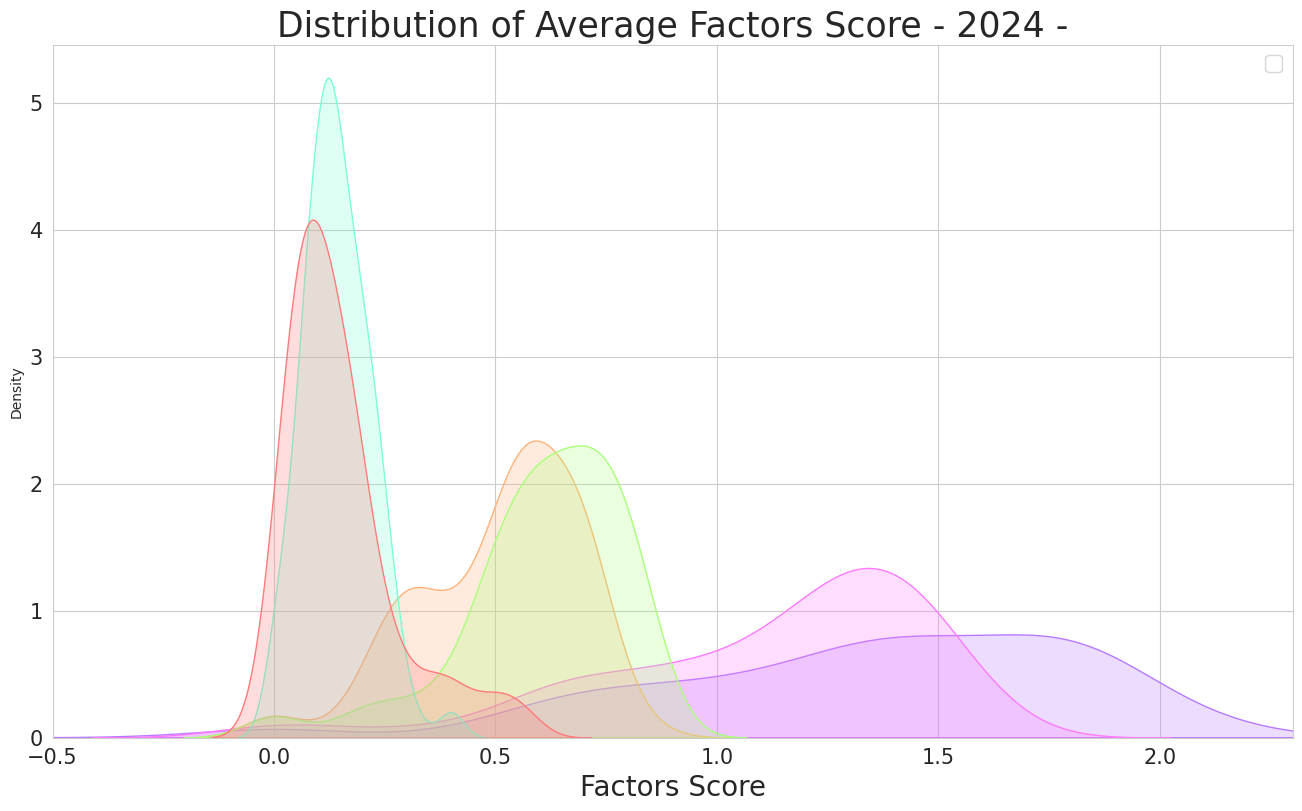

In [49]:
## Creating the grouped table
country_factors_avg = data[data['Year'] == 2024].groupby(by = ['Country or region'])[['GDP per capita',
       'Social support', 'Health life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption']].mean().reset_index()

plt.figure(figsize = (16, 9))

sns.kdeplot(data = country_factors_avg['GDP per capita'], color = "#B77AFF", shade = True)
sns.kdeplot(data = country_factors_avg['Social support'], color = "#FD7AFF", shade = True)
sns.kdeplot(data = country_factors_avg['Health life expectancy'], color = "#FFB27A", shade = True)
sns.kdeplot(data = country_factors_avg['Freedom'], color = "#A9FF7A", shade = True)
sns.kdeplot(data = country_factors_avg['Generosity'], color = "#7AFFD4", shade = True)
sns.kdeplot(data = country_factors_avg['Perceptions of corruption'], color = "#FF7A7A", shade = True)

plt.xlabel('Factors Score', fontsize = 20)
plt.title('Distribution of Average Factors Score - 2024 -', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((-0.5, 2.3))
plt.legend(fontsize = 15);

### What leads to Happiness? Let's check it out 

In [50]:
# Calculating the Pearson Correlation

c1 = scipy.stats.pearsonr(data['Score'], data['GDP per capita'])
c2 = scipy.stats.pearsonr(data['Score'], data['Social support'])
c3 = scipy.stats.pearsonr(data['Score'], data['Health life expectancy'])
c4 = scipy.stats.pearsonr(data['Score'], data['Freedom'])
c5 = scipy.stats.pearsonr(data['Score'], data['Generosity'])
c6 = scipy.stats.pearsonr(data['Score'], data['Perceptions of corruption'])

print('Happiness Score + GDP: pearson = ', round(c1[0],2), '   pvalue = ', round(c1[1],4))
print('Happiness Score + Family: pearson = ', round(c2[0],2), '   pvalue = ', round(c2[1],4))
print('Happiness Score + Health: pearson = ', round(c3[0],2), '   pvalue = ', round(c3[1],4))
print('Happiness Score + Freedom: pearson = ', round(c4[0],2), '   pvalue = ', round(c4[1],4))
print('Happiness Score + Generosity: pearson = ', round(c5[0],2), '   pvalue = ', round(c5[1],4))
print('Happiness Score + Trust: pearson = ', round(c6[0],2), '   pvalue = ', round(c6[1],4))

Happiness Score + GDP: pearson =  0.67    pvalue =  0.0
Happiness Score + Family: pearson =  0.69    pvalue =  0.0
Happiness Score + Health: pearson =  0.64    pvalue =  0.0
Happiness Score + Freedom: pearson =  0.58    pvalue =  0.0
Happiness Score + Generosity: pearson =  0.05    pvalue =  0.1767
Happiness Score + Trust: pearson =  0.44    pvalue =  0.0


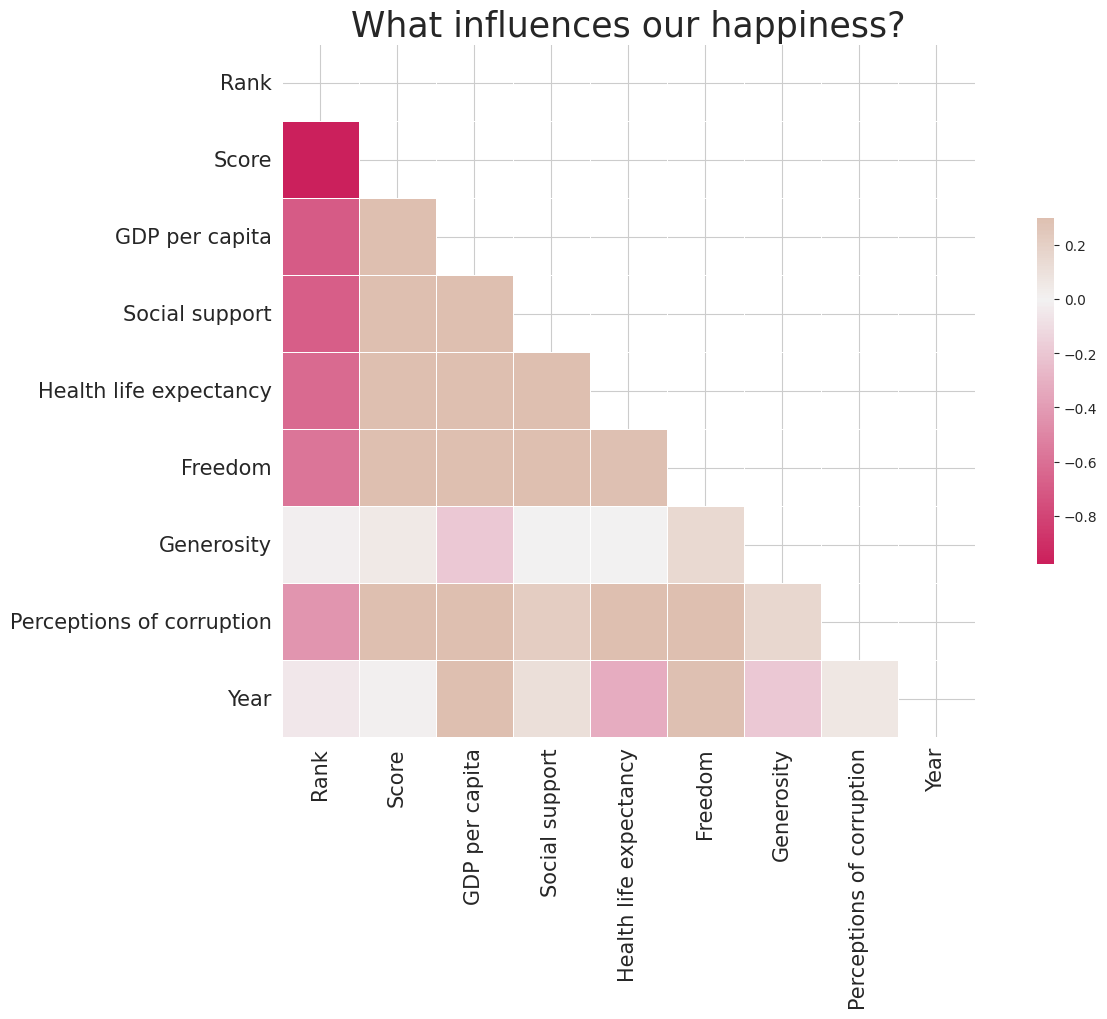

In [56]:
# Computing the Correlation Matrix

data_filtered = data.drop(columns=['Country or region'])
corr = data_filtered.corr()



# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('What influences our happiness?', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

its GDP per catipa on the Top so main factor which influnce is how rich the people are 